c:\Users\Emman\anaconda3\envs\ortho-je\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame.app'

Falling back to a static output.
  warnings.warn(


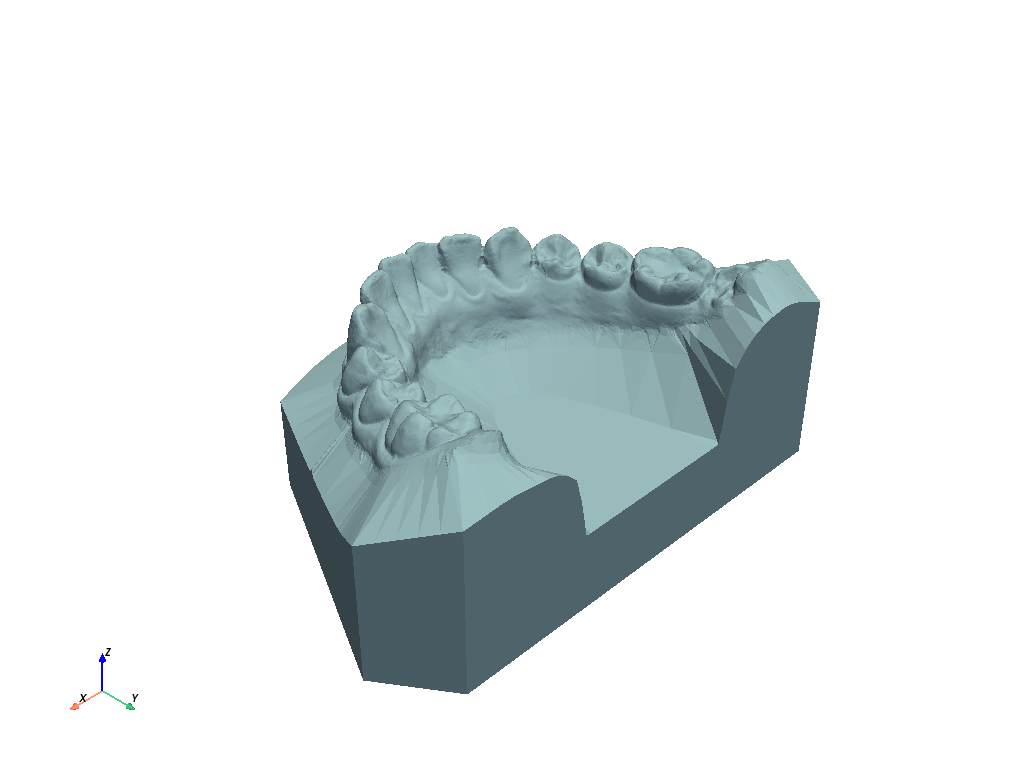

In [1]:
import pyvista as pv
import numpy as np
from skimage import measure
from scipy.ndimage import binary_erosion
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
import trimesh
# Load the STL file
stl_filename = r"C:\Users\Emman\Desktop\JE\Ortho\OrthoCAD_Export_43495989\43495989_shell_occlusion_l.stl"
reader = pv.get_reader(stl_filename)
mesh = reader.read()

mesh.plot()



In [2]:
mesh

PolyData,Information
N Cells,189878
N Points,95003
N Strips,0
X Bounds,"-4.137e+01, 4.137e+01"
Y Bounds,"-2.627e+01, 2.627e+01"
Z Bounds,"0.000e+00, 3.194e+01"
N Arrays,0


c:\Users\Emman\anaconda3\envs\ortho-je\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame.app'

Falling back to a static output.
  warnings.warn(


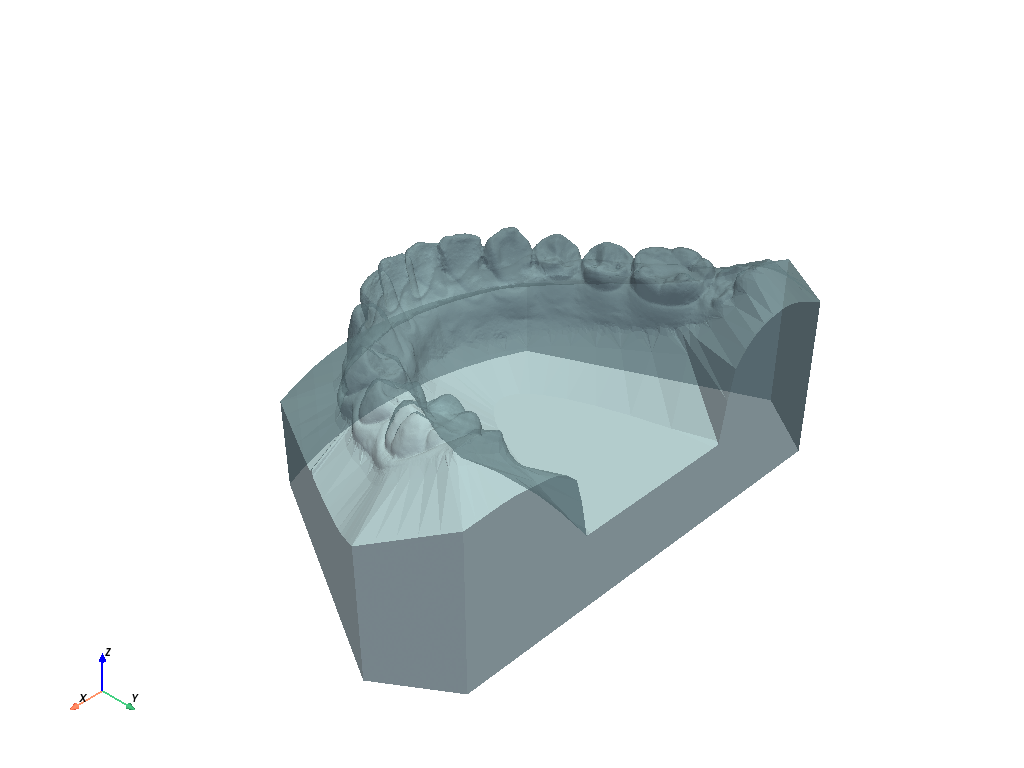

In [10]:
mesh.plot(opacity=0.75)

c:\Users\Emman\anaconda3\envs\ortho-je\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame.app'

Falling back to a static output.
  warnings.warn(


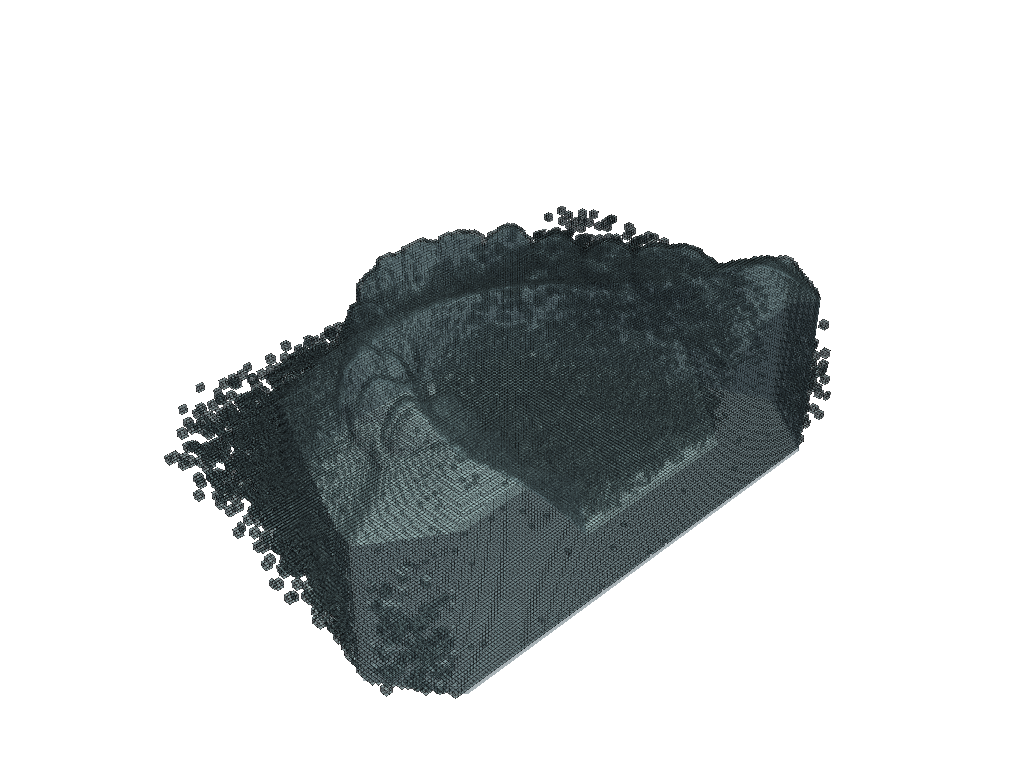

In [11]:
voxels = pv.voxelize(mesh, density=mesh.length / 200,check_surface=False)

p = pv.Plotter()
p.add_mesh(voxels, color=True, show_edges=True, opacity=0.5)
p.add_mesh(mesh, color="lightblue", opacity=0.5)
p.show()

In [20]:
voxels.set_active_scalars('vtkOriginalPointIds')
teeth_part = voxels.threshold([1, 1])

c:\Users\Emman\anaconda3\envs\ortho-je\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame.app'

Falling back to a static output.
  warnings.warn(


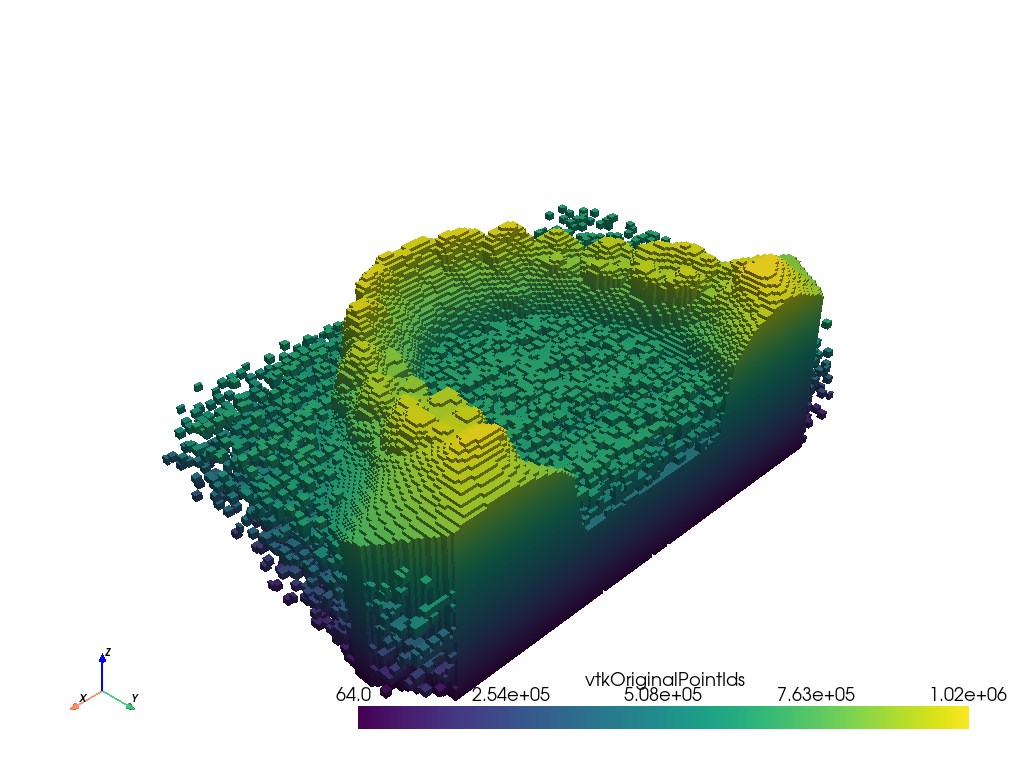

In [25]:
voxels.plot()

In [2]:
import trimesh
stl_filename = r"C:\Users\Emman\Desktop\JE\Ortho\OrthoCAD_Export_43495989\43495989_shell_occlusion_l.stl"
mesh=trimesh.load(stl_filename)

In [17]:
mesh.vertices

TrackedArray([[-26.16896248,  -4.02895355,  20.53007126],
              [-25.80494308,  -4.0744133 ,  20.7734108 ],
              [-26.34581375,  -3.88300133,  20.5393219 ],
              ...,
              [  2.81329513,  26.27416801,  12.49399662],
              [ -2.81329513,  26.27416801,  12.49399662],
              [ -7.50197935,  26.27416611,  12.49399662]])

In [18]:
mesh.vertices[:,1]

TrackedArray([-4.02895355, -4.0744133 , -3.88300133, ..., 26.27416801,
              26.27416801, 26.27416611])

In [20]:
def to_binary(number):
    assert(number<8)
    if number>3:
        return np.array(list(np.binary_repr(number)),dtype=int)
    else:
        res=np.zeros(3)
        if number>1:
            res[1:]=np.array(list(np.binary_repr(number)),dtype=int)
        else:
            res[2:]=np.array(list(np.binary_repr(number)),dtype=int)
        return res

In [41]:
import trimesh
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
path=r"C:\Users\Emman\Desktop\JE\Ortho\OrthoCAD_Export_43495989\43495989_shell_occlusion_l.stl"
mesh = trimesh.load(path)
# Extract mesh vertices as features
vertices = mesh.vertices
faces = mesh.faces
# Perform K-means clustering
num_clusters = 3  # Number of desired clusters
kmeans = KMeans(n_clusters=num_clusters)
labels = kmeans.fit_predict(vertices)

# Assign the cluster labels to the mesh faces
face_colors = np.zeros((len(mesh.faces), 3))
for face_index, label in enumerate(labels):
    face_colors[face_index] = to_binary(label)

# Set the face colors in the mesh
mesh.visual.vertex_colors = face_colors
mesh.visual.face_colors = np.ones(len(mesh.vertices), dtype=np.uint8) * 255

# Visualize the segmented mesh
mesh.show()

c:\Users\Emman\anaconda3\envs\ortho-je\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: Colors not of appropriate shape!

In [43]:
import plotly.express as px
import plotly.graph_objects as go
fig.add_trace(
    go.Scatter3d(x=[100],
                 y=[100],
                 z=[100],
                 color=[0,0,0])
)

ModuleNotFoundError: No module named 'plotly'

Text(0.5, 0, 'Z Label')

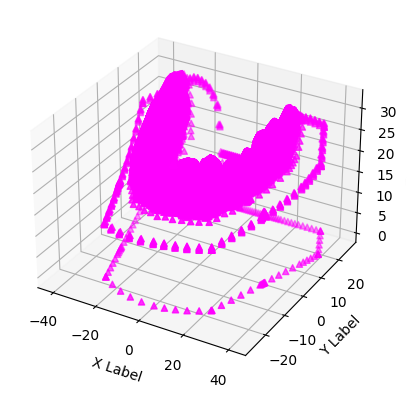

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(mesh.vertices[:,0], mesh.vertices[:,1], mesh.vertices[:,2],marker='^',color=[1,0,1])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')